In [1]:
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.optim as optim
import requests
from torchvision import models
from torchvision import transforms
import time
from skimage.io import imread

# read pretrained vgg19 model

In [2]:
vgg19 = models.vgg19(pretrained=True)
vgg =vgg19.features
print(vgg)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

# freeze parameters

In [3]:
# freeze parameters 训练时不更新
for param in vgg.parameters():
  param.requires_grad_(False)

# load image, convert the image into desired size and convert them into tensor.

In [4]:
 #load image, convert the image into desired size and convert them into tensor.
def load_image(img_path, max_size=400, shape=None):
  image = Image.open(img_path).convert('RGB')
  # make sure the size of each images is smaller than or equal to 400
  if max(image.size)>max_size:
    size=max_size
  else:
    size=max(image.size)
  # if the shape is not none, convert the size into the determined shape
  if shape is not None:
    size=shape
  # convert image into tensor
  in_transform = transforms.Compose(
      [transforms.Resize(size),
       transforms.ToTensor(),
       transforms.Normalize((0.485, 0.456, 0.406),
                  (0.229, 0.224, 0.225))])
  image = in_transform(image)[:3,:,:].unsqueeze(dim=0) 
  # add the batch capacity dimension
  return image                      

# convert tensor into array

In [5]:
def im_convert(tensor):
  image = tensor.data.numpy().squeeze() #remove the batch capacity dimention
  image = image.transpose(1,2,0)#from[channel,height,width] into [height,width,channel]
  #normalization
  image = image*np.array((0.229, 0.224, 0.225))+np.array((0.485, 0.456, 0.406))
  image = image.clip(0,1)
  return image

# read style and content image 

content shape:torch.Size([1, 3, 275, 413])
style shape:torch.Size([1, 3, 275, 413])


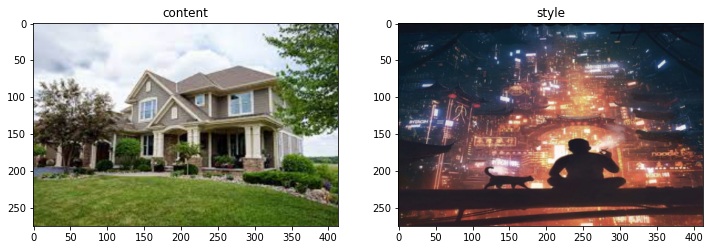

In [6]:
content = load_image("/content/content.jpg", max_size = 400)
print("content shape:{}".format(content.shape))
style = load_image("/content/style.jpg", shape = content.shape[-2:])
print("style shape:{}".format(style.shape))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
ax1.imshow(im_convert(content))
ax1.set_title("content")
ax2.imshow(im_convert(style))
ax2.set_title("style")
plt.show()

# get features from different layers

In [7]:
def get_features(image, model, layers=None):
  if layers is None:
    layers = {'0':'conv1_1',
              '5':'conv2_1',
              '10':'conv3_1',
              '19':'conv4_1',
              '21':'conv4_2',
              '28':'conv5_1'}
  features = {}
  x = image
  for name, layer in model._modules.items():
    x=layer(x)
    if name in layers:
      features[layers[name]]=x
  return features

# gram matrix

In [8]:
def gram_matrix(tensor):
  _, d, h, w = tensor.size()
  tensor = tensor.view(d, h*w)
  gram = torch.mm(tensor, tensor.t())
  return gram

In [12]:
content_features = get_features(content, vgg)
style_features = get_features(style, vgg)
target = content.clone().requires_grad_(True)
style_weights={'conv1_1':0.2,'conv2_1':0.3,'conv3_1':0.2,'conv4_1':0.5,'conv5_1':0.2}
alpha = 0.5
beta = 0.5
content_weight = alpha
style_weight = beta


the 1 epoch start!
the 2 epoch start!
the 3 epoch start!
the 4 epoch start!
the 5 epoch start!
the 6 epoch start!
the 7 epoch start!
the 8 epoch start!
the 9 epoch start!
the 10 epoch start!
the 11 epoch start!
the 12 epoch start!
the 13 epoch start!
the 14 epoch start!
the 15 epoch start!
the 16 epoch start!
the 17 epoch start!
the 18 epoch start!
the 19 epoch start!
the 20 epoch start!
the 21 epoch start!
the 22 epoch start!
the 23 epoch start!
the 24 epoch start!
the 25 epoch start!
the 26 epoch start!
the 27 epoch start!
the 28 epoch start!
the 29 epoch start!
the 30 epoch start!
the 31 epoch start!
the 32 epoch start!
the 33 epoch start!
the 34 epoch start!
the 35 epoch start!
the 36 epoch start!
the 37 epoch start!
the 38 epoch start!
the 39 epoch start!
the 40 epoch start!
the 41 epoch start!
the 42 epoch start!
the 43 epoch start!
the 44 epoch start!
the 45 epoch start!
the 46 epoch start!
the 47 epoch start!
the 48 epoch start!
the 49 epoch start!
the 50 epoch start!
the 51 ep

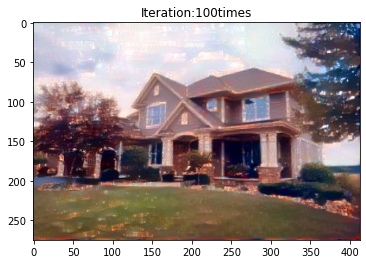

the 101 epoch start!
the 102 epoch start!
the 103 epoch start!
the 104 epoch start!
the 105 epoch start!
the 106 epoch start!
the 107 epoch start!
the 108 epoch start!
the 109 epoch start!
the 110 epoch start!
the 111 epoch start!
the 112 epoch start!
the 113 epoch start!
the 114 epoch start!
the 115 epoch start!
the 116 epoch start!
the 117 epoch start!
the 118 epoch start!
the 119 epoch start!
the 120 epoch start!
the 121 epoch start!
the 122 epoch start!
the 123 epoch start!
the 124 epoch start!
the 125 epoch start!
the 126 epoch start!
the 127 epoch start!
the 128 epoch start!
the 129 epoch start!
the 130 epoch start!
the 131 epoch start!
the 132 epoch start!
the 133 epoch start!
the 134 epoch start!
the 135 epoch start!
the 136 epoch start!
the 137 epoch start!
the 138 epoch start!
the 139 epoch start!
the 140 epoch start!
the 141 epoch start!
the 142 epoch start!
the 143 epoch start!
the 144 epoch start!
the 145 epoch start!
the 146 epoch start!
the 147 epoch start!
the 148 epoch

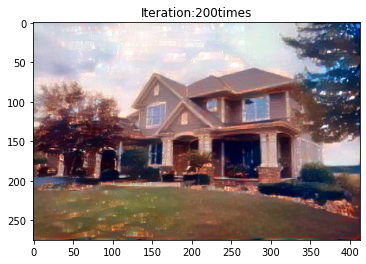

the 201 epoch start!
the 202 epoch start!
the 203 epoch start!
the 204 epoch start!
the 205 epoch start!
the 206 epoch start!
the 207 epoch start!
the 208 epoch start!
the 209 epoch start!
the 210 epoch start!
the 211 epoch start!
the 212 epoch start!
the 213 epoch start!
the 214 epoch start!
the 215 epoch start!
the 216 epoch start!
the 217 epoch start!
the 218 epoch start!
the 219 epoch start!
the 220 epoch start!
the 221 epoch start!
the 222 epoch start!
the 223 epoch start!
the 224 epoch start!
the 225 epoch start!
the 226 epoch start!
the 227 epoch start!
the 228 epoch start!
the 229 epoch start!
the 230 epoch start!
the 231 epoch start!
the 232 epoch start!
the 233 epoch start!
the 234 epoch start!
the 235 epoch start!
the 236 epoch start!
the 237 epoch start!
the 238 epoch start!
the 239 epoch start!
the 240 epoch start!
the 241 epoch start!
the 242 epoch start!
the 243 epoch start!
the 244 epoch start!
the 245 epoch start!
the 246 epoch start!
the 247 epoch start!
the 248 epoch

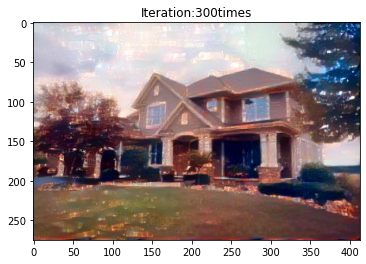

the 301 epoch start!
the 302 epoch start!
the 303 epoch start!
the 304 epoch start!
the 305 epoch start!
the 306 epoch start!
the 307 epoch start!
the 308 epoch start!
the 309 epoch start!
the 310 epoch start!
the 311 epoch start!
the 312 epoch start!
the 313 epoch start!
the 314 epoch start!
the 315 epoch start!
the 316 epoch start!
the 317 epoch start!
the 318 epoch start!
the 319 epoch start!
the 320 epoch start!
the 321 epoch start!
the 322 epoch start!
the 323 epoch start!
the 324 epoch start!
the 325 epoch start!
the 326 epoch start!
the 327 epoch start!
the 328 epoch start!
the 329 epoch start!
the 330 epoch start!
the 331 epoch start!
the 332 epoch start!
the 333 epoch start!
the 334 epoch start!
the 335 epoch start!
the 336 epoch start!
the 337 epoch start!
the 338 epoch start!
the 339 epoch start!
the 340 epoch start!
the 341 epoch start!
the 342 epoch start!
the 343 epoch start!
the 344 epoch start!
the 345 epoch start!
the 346 epoch start!
the 347 epoch start!
the 348 epoch

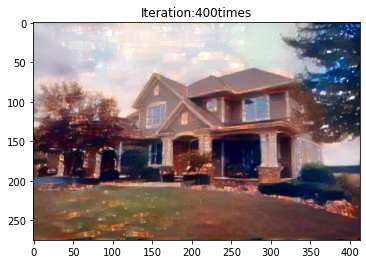

the 401 epoch start!
the 402 epoch start!
the 403 epoch start!
the 404 epoch start!
the 405 epoch start!
the 406 epoch start!
the 407 epoch start!
the 408 epoch start!
the 409 epoch start!
the 410 epoch start!
the 411 epoch start!
the 412 epoch start!
the 413 epoch start!
the 414 epoch start!
the 415 epoch start!
the 416 epoch start!
the 417 epoch start!
the 418 epoch start!
the 419 epoch start!
the 420 epoch start!
the 421 epoch start!
the 422 epoch start!
the 423 epoch start!
the 424 epoch start!
the 425 epoch start!
the 426 epoch start!
the 427 epoch start!
the 428 epoch start!
the 429 epoch start!
the 430 epoch start!
the 431 epoch start!
the 432 epoch start!
the 433 epoch start!
the 434 epoch start!
the 435 epoch start!
the 436 epoch start!
the 437 epoch start!
the 438 epoch start!
the 439 epoch start!
the 440 epoch start!
the 441 epoch start!
the 442 epoch start!
the 443 epoch start!
the 444 epoch start!
the 445 epoch start!
the 446 epoch start!
the 447 epoch start!
the 448 epoch

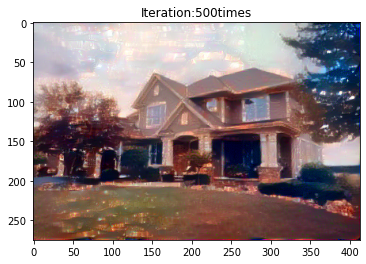

the 501 epoch start!
the 502 epoch start!
the 503 epoch start!
the 504 epoch start!
the 505 epoch start!
the 506 epoch start!
the 507 epoch start!
the 508 epoch start!
the 509 epoch start!
the 510 epoch start!
the 511 epoch start!
the 512 epoch start!
the 513 epoch start!
the 514 epoch start!
the 515 epoch start!
the 516 epoch start!
the 517 epoch start!
the 518 epoch start!
the 519 epoch start!
the 520 epoch start!
the 521 epoch start!
the 522 epoch start!
the 523 epoch start!
the 524 epoch start!
the 525 epoch start!
the 526 epoch start!
the 527 epoch start!
the 528 epoch start!
the 529 epoch start!
the 530 epoch start!
the 531 epoch start!
the 532 epoch start!
the 533 epoch start!
the 534 epoch start!
the 535 epoch start!
the 536 epoch start!
the 537 epoch start!
the 538 epoch start!
the 539 epoch start!
the 540 epoch start!
the 541 epoch start!
the 542 epoch start!
the 543 epoch start!
the 544 epoch start!
the 545 epoch start!
the 546 epoch start!
the 547 epoch start!
the 548 epoch

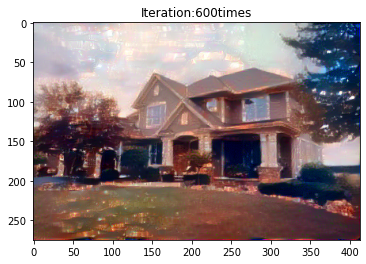

the 601 epoch start!
the 602 epoch start!
the 603 epoch start!
the 604 epoch start!
the 605 epoch start!
the 606 epoch start!
the 607 epoch start!
the 608 epoch start!
the 609 epoch start!
the 610 epoch start!
the 611 epoch start!
the 612 epoch start!
the 613 epoch start!
the 614 epoch start!
the 615 epoch start!
the 616 epoch start!
the 617 epoch start!
the 618 epoch start!
the 619 epoch start!
the 620 epoch start!
the 621 epoch start!
the 622 epoch start!
the 623 epoch start!
the 624 epoch start!
the 625 epoch start!
the 626 epoch start!
the 627 epoch start!
the 628 epoch start!
the 629 epoch start!
the 630 epoch start!
the 631 epoch start!
the 632 epoch start!
the 633 epoch start!
the 634 epoch start!
the 635 epoch start!
the 636 epoch start!
the 637 epoch start!
the 638 epoch start!
the 639 epoch start!
the 640 epoch start!
the 641 epoch start!
the 642 epoch start!
the 643 epoch start!
the 644 epoch start!
the 645 epoch start!
the 646 epoch start!
the 647 epoch start!
the 648 epoch

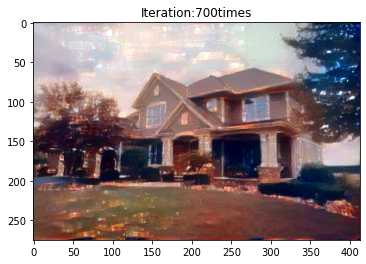

the 701 epoch start!
the 702 epoch start!
the 703 epoch start!
the 704 epoch start!
the 705 epoch start!
the 706 epoch start!
the 707 epoch start!
the 708 epoch start!
the 709 epoch start!
the 710 epoch start!
the 711 epoch start!
the 712 epoch start!
the 713 epoch start!
the 714 epoch start!
the 715 epoch start!
the 716 epoch start!
the 717 epoch start!
the 718 epoch start!
the 719 epoch start!
the 720 epoch start!
the 721 epoch start!
the 722 epoch start!
the 723 epoch start!
the 724 epoch start!
the 725 epoch start!
the 726 epoch start!
the 727 epoch start!
the 728 epoch start!
the 729 epoch start!
the 730 epoch start!
the 731 epoch start!
the 732 epoch start!
the 733 epoch start!
the 734 epoch start!
the 735 epoch start!
the 736 epoch start!
the 737 epoch start!
the 738 epoch start!
the 739 epoch start!
the 740 epoch start!
the 741 epoch start!
the 742 epoch start!
the 743 epoch start!
the 744 epoch start!
the 745 epoch start!
the 746 epoch start!
the 747 epoch start!
the 748 epoch

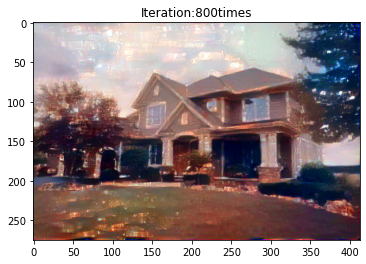

the 801 epoch start!
the 802 epoch start!
the 803 epoch start!
the 804 epoch start!
the 805 epoch start!
the 806 epoch start!
the 807 epoch start!
the 808 epoch start!
the 809 epoch start!
the 810 epoch start!
the 811 epoch start!
the 812 epoch start!
the 813 epoch start!
the 814 epoch start!
the 815 epoch start!
the 816 epoch start!
the 817 epoch start!
the 818 epoch start!
the 819 epoch start!
the 820 epoch start!
the 821 epoch start!
the 822 epoch start!
the 823 epoch start!
the 824 epoch start!
the 825 epoch start!
the 826 epoch start!
the 827 epoch start!
the 828 epoch start!
the 829 epoch start!
the 830 epoch start!
the 831 epoch start!
the 832 epoch start!
the 833 epoch start!
the 834 epoch start!
the 835 epoch start!
the 836 epoch start!
the 837 epoch start!
the 838 epoch start!
the 839 epoch start!
the 840 epoch start!
the 841 epoch start!
the 842 epoch start!
the 843 epoch start!
the 844 epoch start!
the 845 epoch start!
the 846 epoch start!
the 847 epoch start!
the 848 epoch

In [ ]:
show_every = 100
total_loss_all = []
content_loss_all = []
style_loss_all = []
optimizer = optim.Adam([target], lr=0.01)
steps = 1000
t0 = time.time()
for i in range(1,steps+1):
  print("the {} epoch start!".format(i))
  target_features = get_features(target, vgg)
  content_loss = torch.mean((target_features['conv4_2']-content_features['conv4_2'])**2)
  style_loss = 0
  for layer in style_weights:
    target_feature = target_features[layer]
    target_gram = gram_matrix(target_feature)
    style_gram = gram_matrix(style_features[layer])
    _, d, h, w = target_feature.shape
    layer_style_loss = style_weights[layer] * torch.mean((target_gram - style_gram)**2)
    style_loss += layer_style_loss/(d*h*w)

  total_loss = content_weight * content_loss + style_loss*style_weight
  content_loss_all.append(style_loss.item())
  total_loss_all.append(total_loss.item())

  optimizer.zero_grad()
  total_loss.backward()
  optimizer.step()

  if i % show_every == 0:
    print('Total loss:', total_loss.item())
    newim = im_convert(target)
    plt.imshow(newim)
    plt.title("Iteration:"+str(i)+"times")
    plt.show()
